Train Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

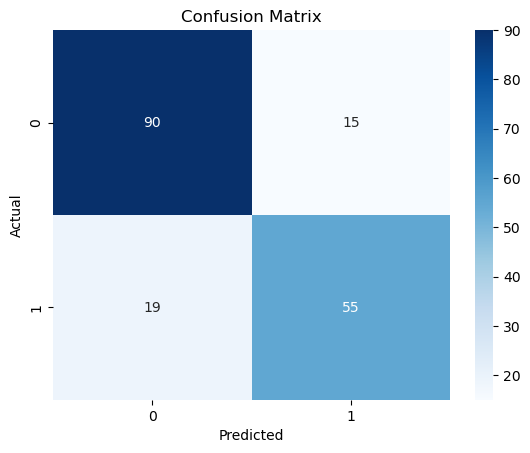

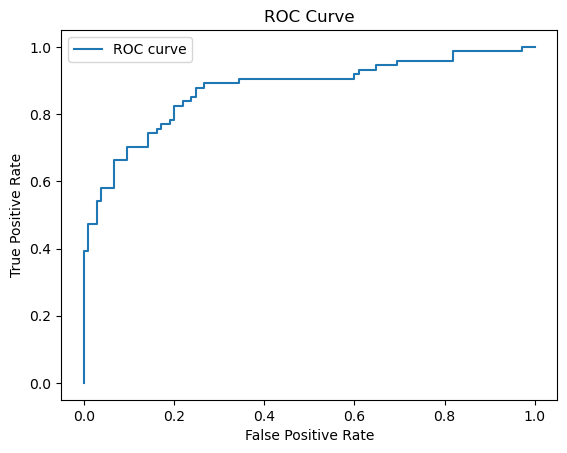


Feature Importance:
PassengerId: 0.0943
Pclass: -0.7785
Sex: -1.2885
Age: -0.3952
SibSp: -0.3407
Parch: -0.1073
Fare: 0.1296
Embarked: -0.1672


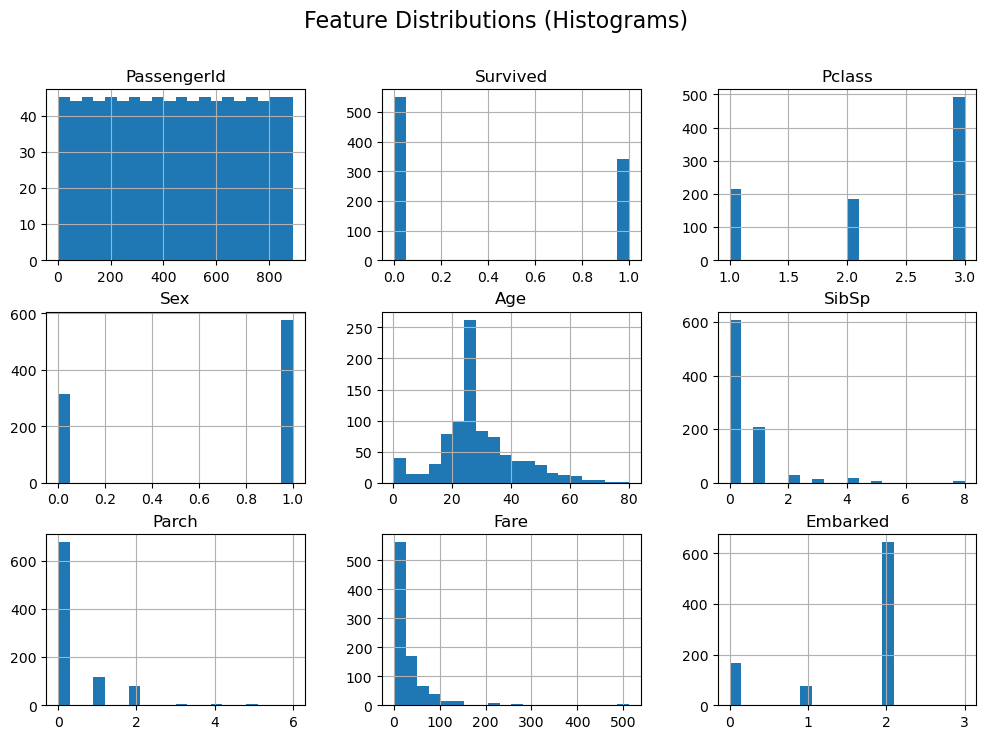

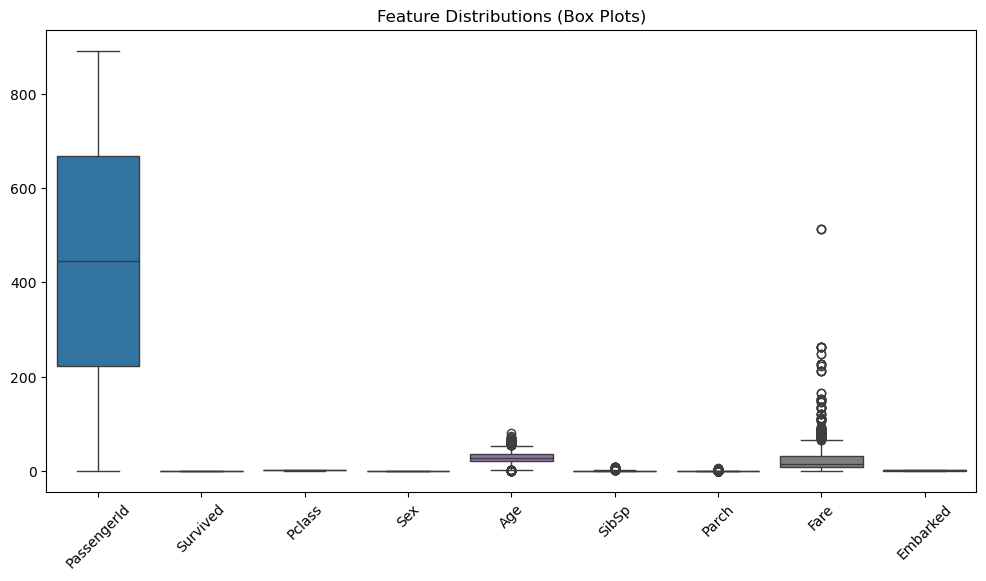

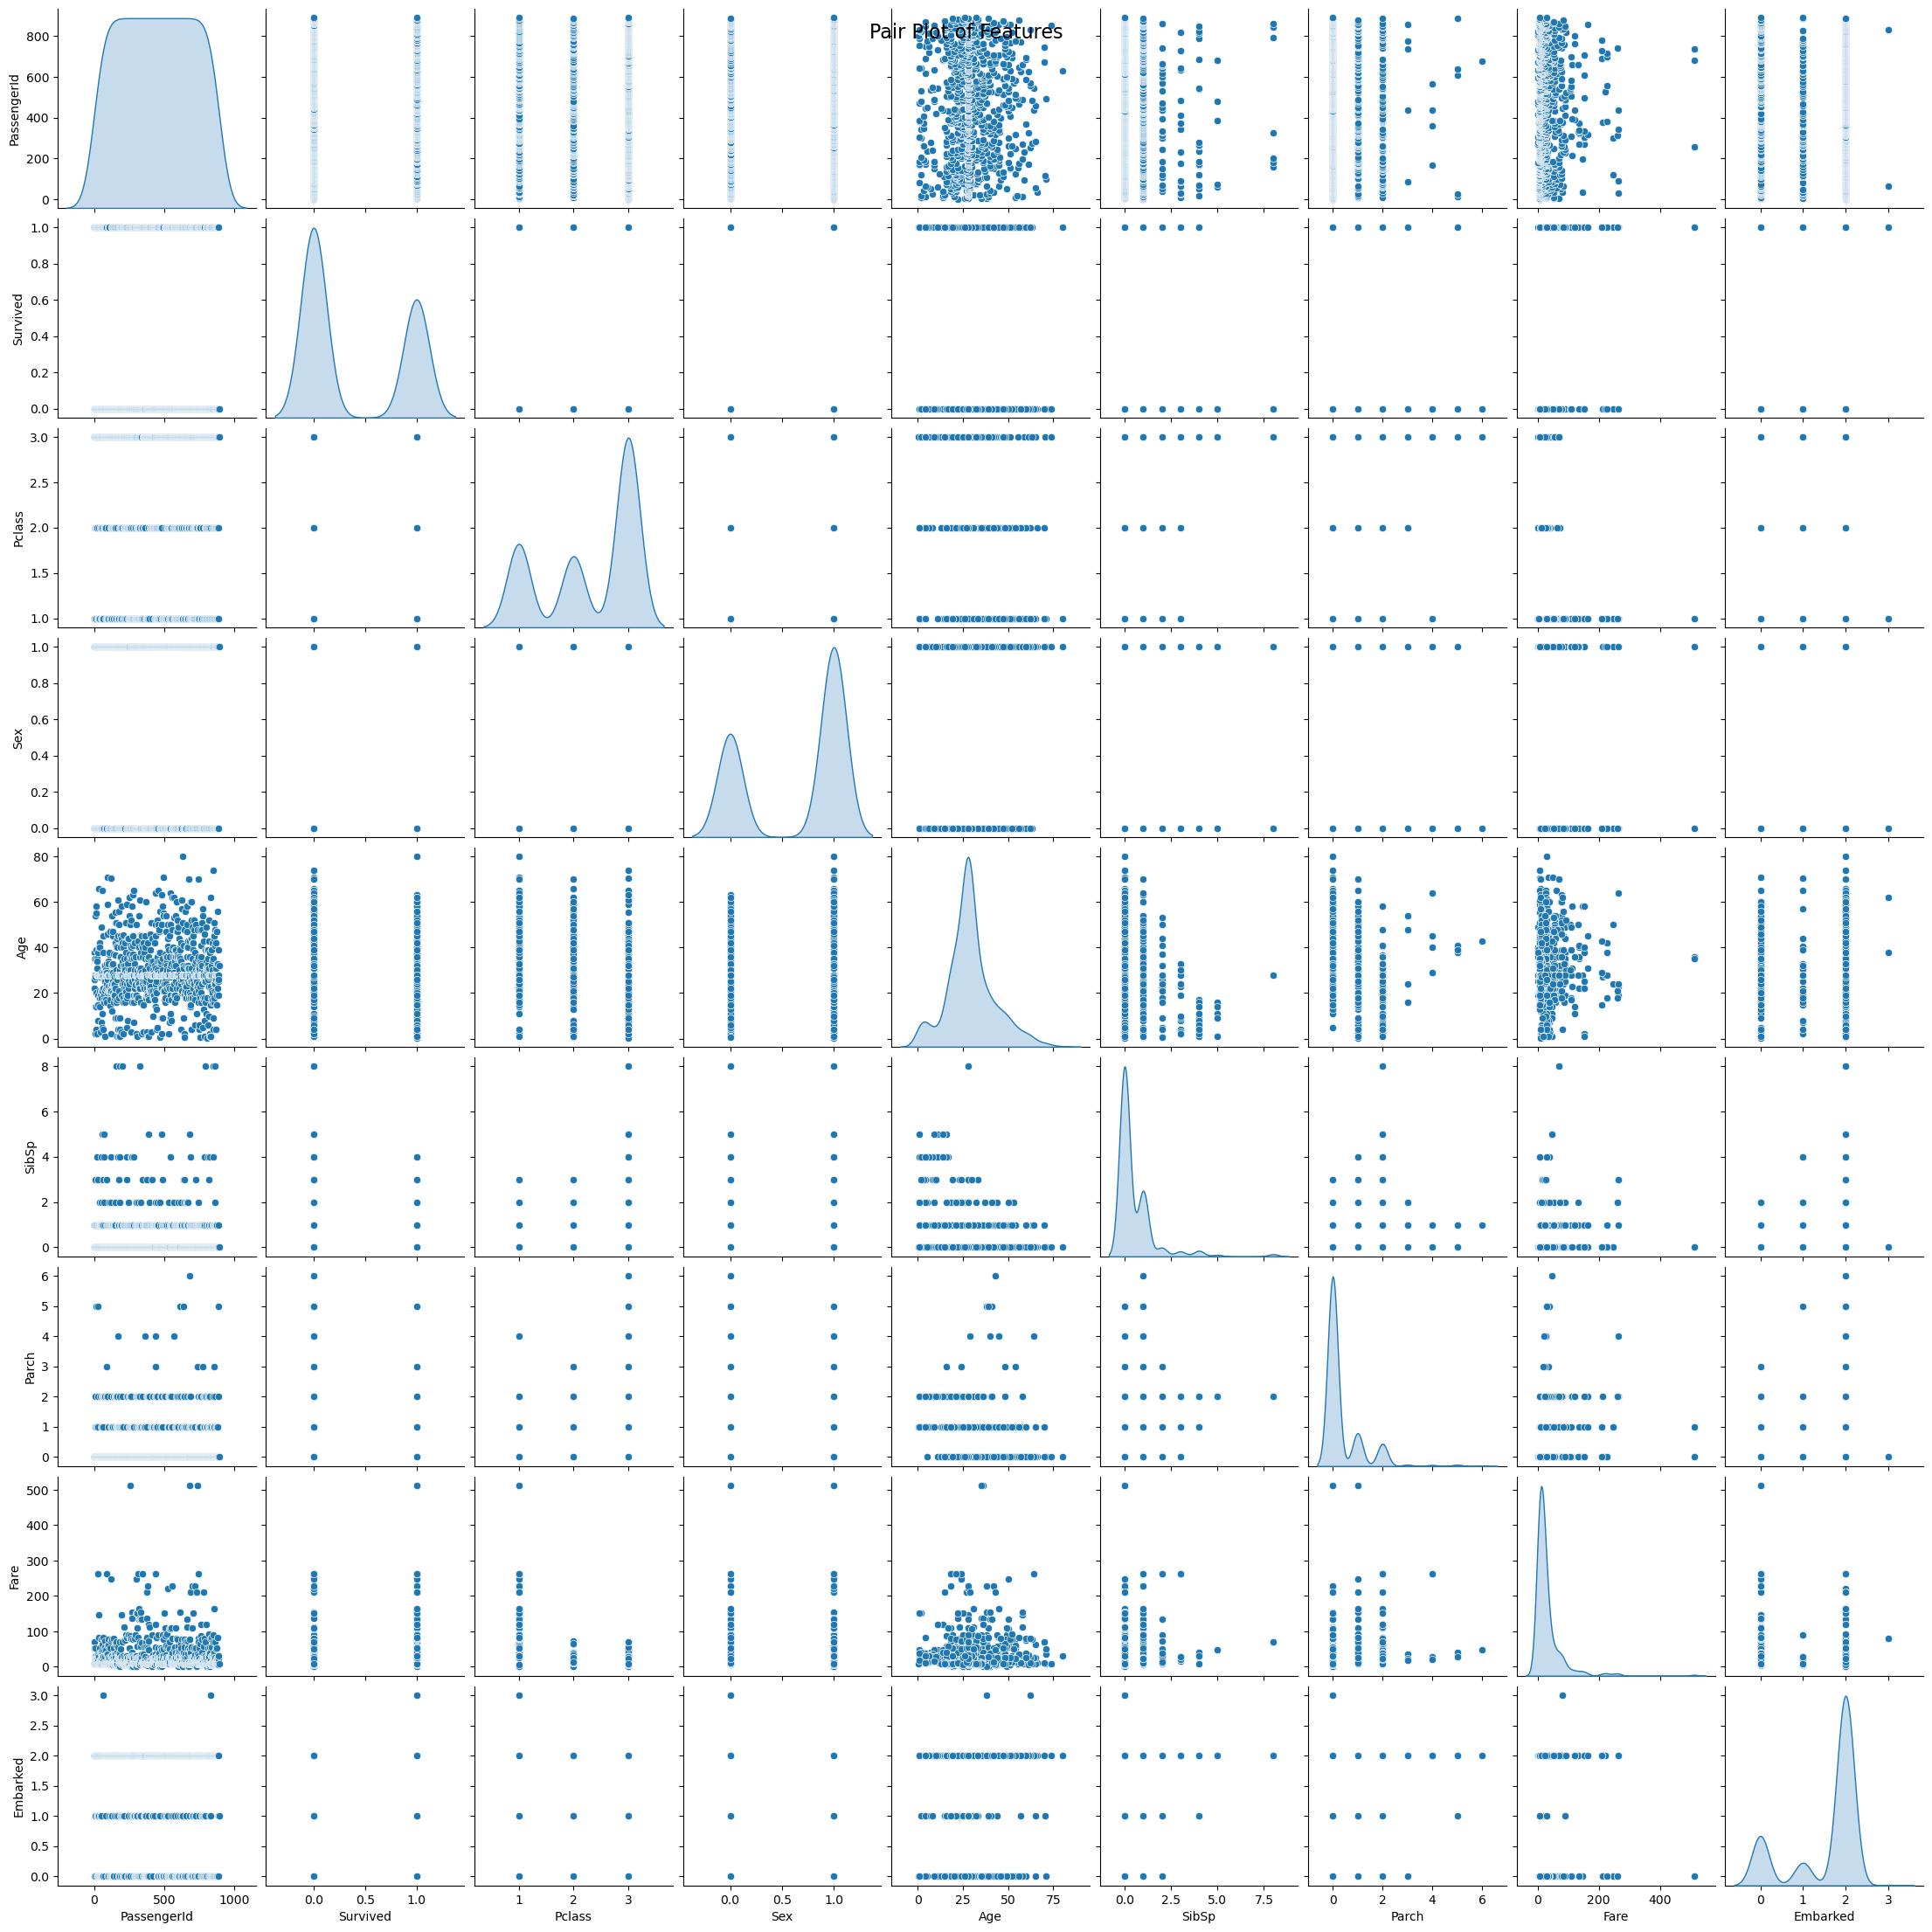

2025-05-13 18:09:50.719 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Correcting file paths
train_file_path = r"D:\Data since couress\Logistic Regression\Logistic Regression\Titanic_train.csv"
test_file_path = r"D:\Data since couress\Logistic Regression\Logistic Regression\Titanic_test.csv"

# Load dataset
try:
    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)
except FileNotFoundError as e:
    print(f"Error: {e}. Please check if the file paths are correct.")
    exit()

# Display basic info
print("Train Data Info:\n")
print(train_df.info())
print("\nTest Data Info:\n")
print(test_df.info())

# Drop irrelevant columns
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore', inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore', inplace=True)

# Handling missing values
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    if col in test_df.columns:
        test_df[col] = test_df[col].map(lambda s: le.classes_.tolist().index(s) if s in le.classes_ else -1)
    label_encoders[col] = le

# Defining features and target
if 'Survived' not in train_df.columns:
    print("Error: 'Survived' column not found in training data.")
    exit()

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
print("\nFeature Importance:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# -------------------- Data Visualizations --------------------

# Histograms for numerical features
train_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df)
plt.title("Feature Distributions (Box Plots)")
plt.xticks(rotation=45)
plt.show()

# Pair plots to examine relationships
sns.pairplot(train_df, diag_kind='kde')
plt.suptitle("Pair Plot of Features", fontsize=16)
plt.show()

# -------------------- Streamlit Deployment --------------------

def predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked):
    """Function to predict survival using trained model."""
    input_data = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex, Embarked]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return "Survived" if prediction[0] == 1 else "Did Not Survive"

# Streamlit App
st.title("Titanic Survival Prediction")
st.write("Enter passenger details to predict survival.")

# User Inputs
Pclass = st.selectbox("Passenger Class (1 = First, 2 = Second, 3 = Third)", [1, 2, 3])
Age = st.slider("Age", min_value=0, max_value=80, value=30)
SibSp = st.slider("Number of Siblings/Spouses Aboard", min_value=0, max_value=8, value=0)
Parch = st.slider("Number of Parents/Children Aboard", min_value=0, max_value=6, value=0)
Fare = st.slider("Fare Paid", min_value=0, max_value=500, value=50)
Sex = st.selectbox("Sex (0 = Female, 1 = Male)", [0, 1])
Embarked = st.selectbox("Embarked (0 = C, 1 = Q, 2 = S)", [0, 1, 2])

# Prediction Button
if st.button("Predict Survival"):
    result = predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked)
    st.write(f"Prediction: **{result}**")
